<a href="https://colab.research.google.com/github/jeffreyphilipbiju/telecom-churn-analysis/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Week 1 – Data Collection & Exploratory Data Analysis (EDA)


# Problem Statement
Telecom companies lose millions due to customer churn. Your goal is to analyze historical
customer data to identify key indicators of churn, create a churn prediction model, and
provide actionable business recommendations to reduce churn.

Churn refers to when a customer stops doing business with a company. customer churn means the customer has canceled their subscription or switched to another provider.

💡 In simple terms:
Churned = Yes → The customer left the company.

Churned = No → The customer stayed.


# -------------------- Step 1: Load & Understand the Dataset--------------------

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Telco-Customer-Churn Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


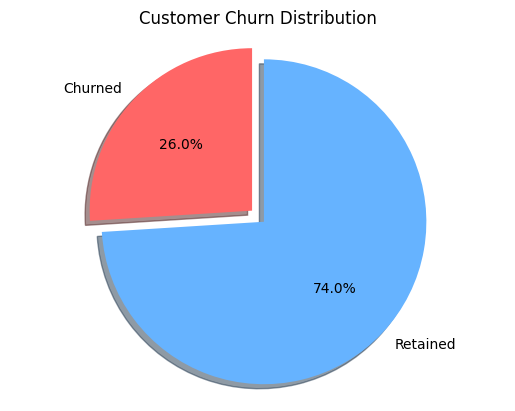

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Churned', 'Retained']
sizes = [26, 74]
colors = ['#ff6666', '#66b3ff']  # Red for churn, blue for retained
explode = (0.1, 0)  # Slightly pull out churned slice

# Create Pie Chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title('Customer Churn Distribution')
plt.axis('equal')  # Keeps circle shape
plt.show()


In [ ]:
print("Shape:", df.shape)             # Rows & columns
print(df.head())                      # First 5 rows
print(df.info())                      # Data types & nulls
print(df.describe())                  # Summary statistics (numerical columns)


Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

# -------------------- Step 2: Initial Exploration--------------------



🔹 Check for Missing Values

In [ ]:
# Missing values in the dataset
print("Missing values:\n", df.isnull().sum())


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Fix TotalCharges column:

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing after conversion:", df['TotalCharges'].isnull().sum())

# Drop rows where TotalCharges is missing
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)

#Converted TotalCharges from object to numeric.
#Dropped 11 rows with missing TotalCharges.


Missing after conversion: 11


🔹 Identify Categorical vs Numerical Columns



In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# -------------------- Step 3: Target Variable Understanding--------------------



target variable – Churn – to understand how many customers left the company (churned) vs. stayed.

In [ ]:
# Class distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))  # Percentage


Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


5163 customers did not churn.

1869 customers churned.

Only 26.6% of customers churned.

# --------------------Step 4: Univariate Analysis (Single Variable)--------------------





🔸 Categorical Features

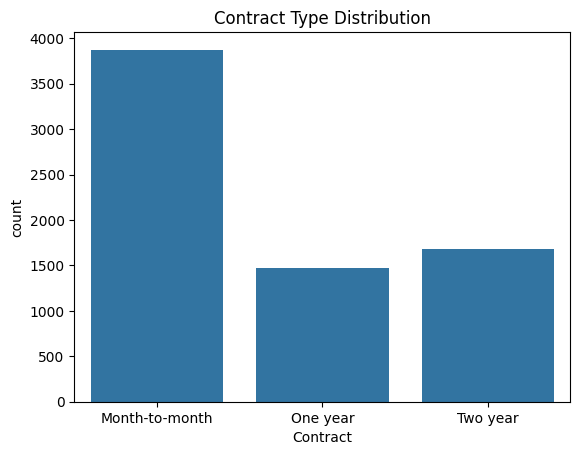

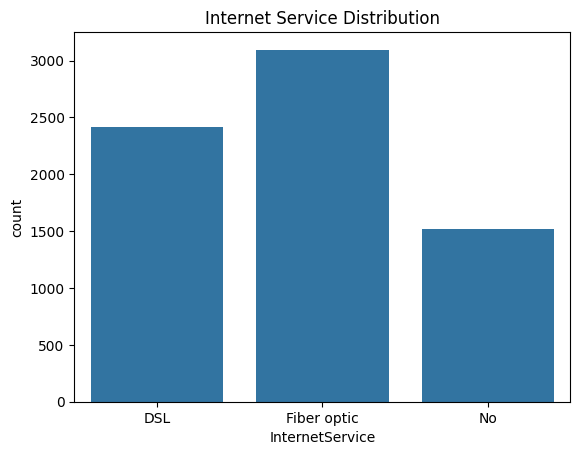

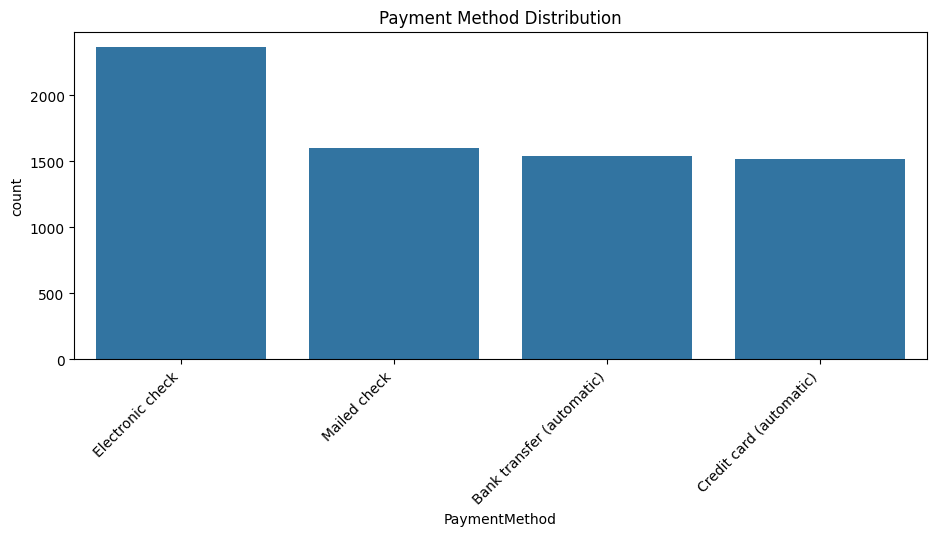

In [ ]:
sns.countplot(x='Contract', data=df)
plt.title("Contract Type Distribution")
plt.show()

sns.countplot(x='InternetService', data=df)
plt.title("Internet Service Distribution")
plt.show()

plt.figure(figsize=(10, 6))  # Set figure size first
sns.countplot(x='PaymentMethod', data=df)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45, ha='right')  # Optional: rotate labels for readability
plt.tight_layout(pad=3)  # Optional: ensure text is not cut off
plt.show()



### 📊 1. Contract Type Distribution

✅ **Insight:**  
Most customers (~4000) are on **Month-to-month** contracts.  
Far fewer are on **One year** or **Two year** contracts.

💡 **Why this matters:**  
Month-to-month users are more flexible and more likely to churn, since they can leave anytime without long-term commitment.  
This feature could be **strongly predictive of churn**.

---

### 📡 2. Internet Service Distribution

✅ **Insight:**  
**Fiber optic** service is the most used, followed by **DSL**.  
A significant portion of customers **do not have internet service**.

💡 **Why this matters:**  
Customers with **Fiber optic** may face higher bills, which could lead to a **higher risk of churn**.  
Those with **No internet service** might be less engaged or using fewer services — possibly **less likely to churn**.

---

### 💳 3. Payment Method Distribution

✅ **Insight:**  
**Electronic check** is the most common payment method.  
Others like **Mailed check**, **Bank transfer (automatic)**, and **Credit card (automatic)** are used almost equally.

💡 **Why this matters:**  
Research shows that **manual payment methods** like Electronic check are often **linked to higher churn**.  
Customers with **automatic payments** (bank or credit card) tend to stay longer.

---

### 🧠 Summary of All Three Features

| Feature           | Key Risk Indicator for Churn                          |
|------------------|--------------------------------------------------------|
| Contract Type     | Month-to-month = **High churn risk**                  |
| Internet Service  | Fiber optic = **Possibly higher churn** (due to cost) |
| Payment Method    | Electronic check = **Higher churn tendency**          |


🔸 Numerical Features

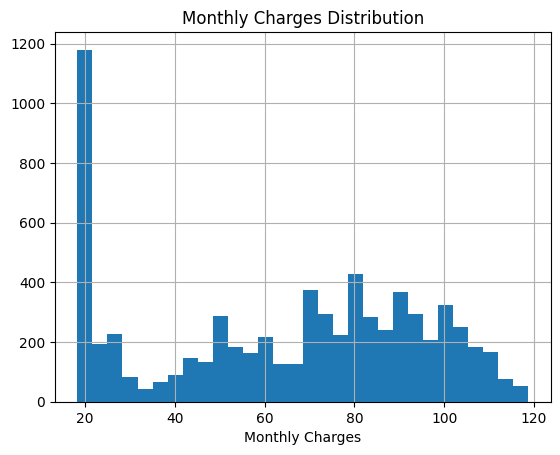

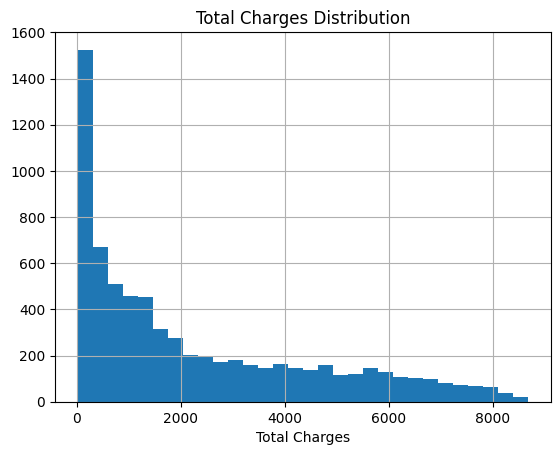

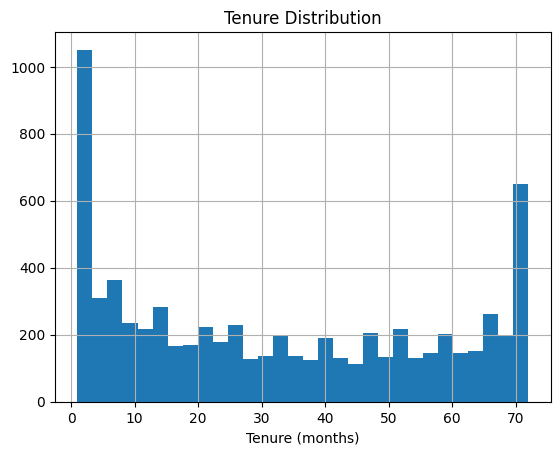

In [ ]:
df['MonthlyCharges'].hist(bins=30)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.show()

df['TotalCharges'].hist(bins=30)
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.show()

df['tenure'].hist(bins=30)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.show()


### 📈 Univariate Analysis of Numerical Features

---

#### 💰 1. Monthly Charges Distribution

✅ **Insight:**  
- Monthly charges range from around $20 to $120.
- A large spike at the **lower end (~$20)** suggests a significant number of low-paying customers.
- The rest are spread out fairly evenly.

💡 **Why this matters:**  
- High variability in monthly charges may reflect differences in services subscribed.
- Customers with **higher monthly charges** may be **more likely to churn** if they feel they’re not getting value.

---

#### 💵 2. Total Charges Distribution

✅ **Insight:**  
- Heavily **right-skewed** distribution.
- Many customers have **low total charges**, suggesting new or short-term users.
- A few customers have charges going up to **$8000+**.

💡 **Why this matters:**  
- TotalCharges is cumulative; new customers haven’t built much yet.
- **Skewed distribution** may require transformation (e.g., log scale) for modeling.

---

#### 🕒 3. Tenure Distribution

✅ **Insight:**  
- Many customers are either **very new (0–5 months)** or **long-term (around 70 months)**.
- Very few in the mid-range.

💡 **Why this matters:**  
- New users (low tenure) are often **at higher risk of churn**.
- Long-term users may be **loyal customers**.

---

### 🧠 Summary

| Feature         | Observation                                       |
|----------------|----------------------------------------------------|
| MonthlyCharges  | Peak around $20; varies widely                    |
| TotalCharges    | Right-skewed; many low, few very high             |
| Tenure          | Bimodal: many new or very long-term customers     |



# --------------------Step 5: Bivariate Analysis (Two Variables)--------------------





🔸 Categorical vs Churn

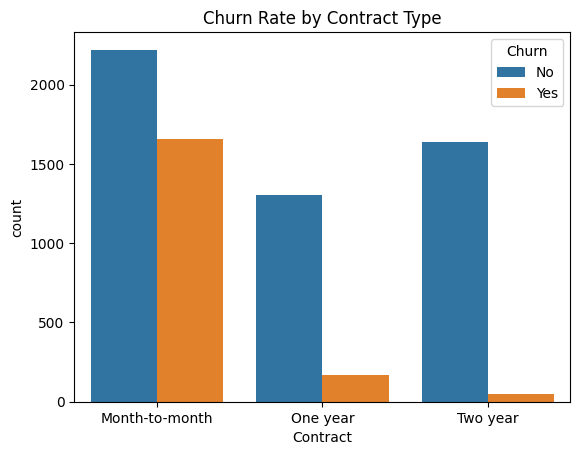

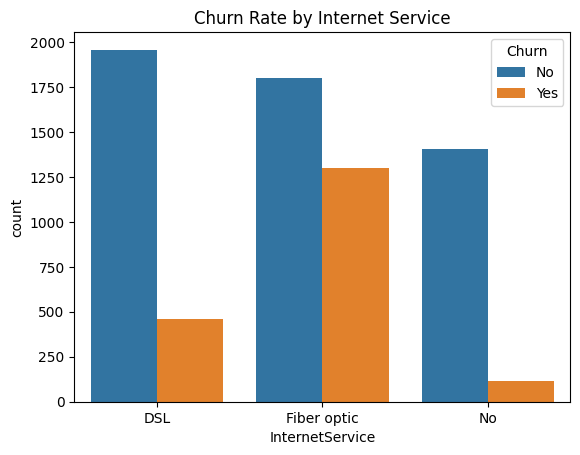

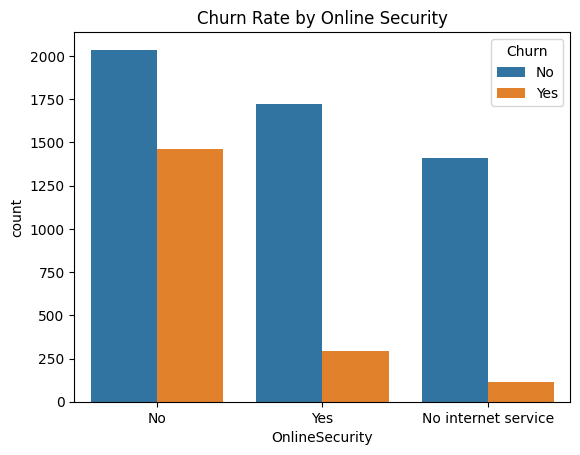

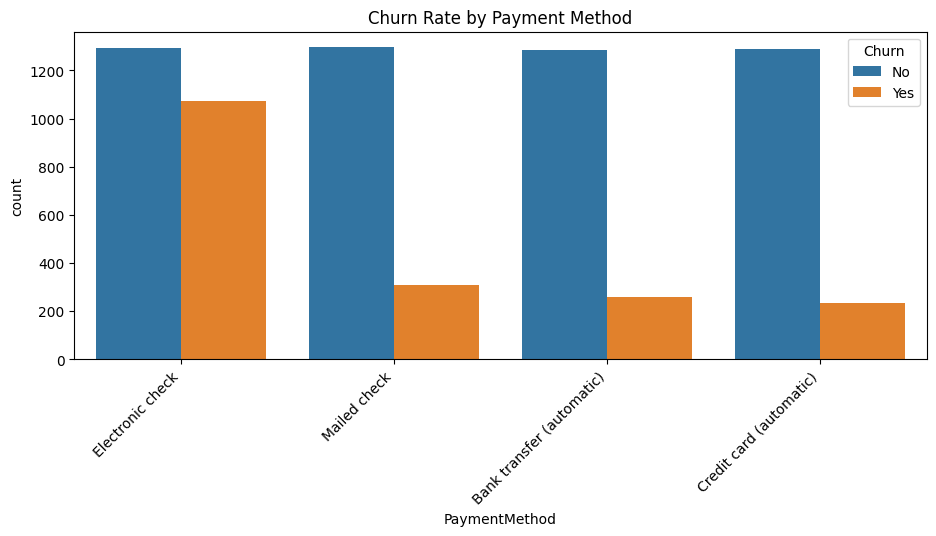

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn Rate by Internet Service")
plt.show()

sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title("Churn Rate by Online Security")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45, ha='right')  # Optional: rotate for readability
plt.tight_layout(pad=3)
plt.show()

### 🔍 Bivariate Analysis – Churn by Key Features

---

#### 📉 1. Contract Type vs Churn
- **Month-to-month** contracts have the **highest churn rate**.
- Customers with **One or Two year contracts** churn significantly less.

💡 Month-to-month customers are flexible and can leave easily — indicating **high churn risk**.

---

#### 🌐 2. Internet Service vs Churn
- **Fiber optic** users churn the most.
- **DSL** users churn moderately.
- Customers with **no internet service** churn the least.

💡 High cost of fiber services might explain the churn.

---

#### 🔐 3. Online Security vs Churn
- Customers **without online security** churn more.
- Those **with online security** churn less.

💡 Security features might make users feel more secure, or reflect higher engagement.

---



🔸 Numerical vs Churn

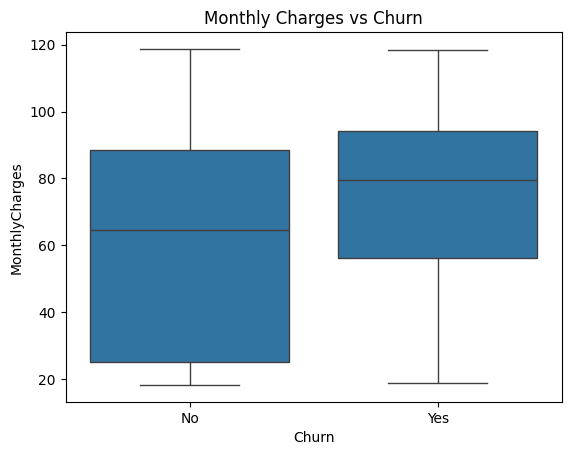

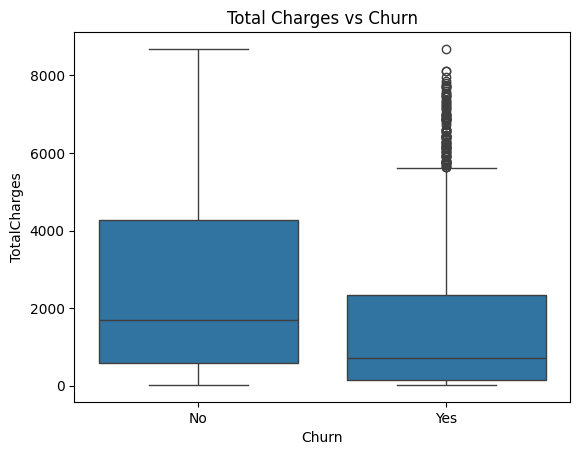

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


### 📊 Monthly Charges vs Churn

- Customers who **churned ("Yes")** tend to have **higher monthly charges** compared to those who stayed.
- The **median monthly charge** for churned customers is approximately **$80**, while for non-churned customers it's closer to **$65**.
- This indicates that **higher pricing may be a churn driver**, suggesting **price sensitivity** among customers.

---

### 💰 Total Charges vs Churn

- Interestingly, churned customers show **lower total charges**, despite higher monthly fees.
- Non-churned customers have a **broader distribution**, with many accumulating **significantly higher total charges** over time.
- The churned group clusters at lower total charges—likely because they **leave early**, before accumulating value.
- A few **outliers** among churned users paid high total amounts, possibly due to shorter tenure with high service tiers.

---

### 📌 Key Insights

- **Price Sensitivity**: Customers paying higher monthly fees are more prone to churn—pricing strategies should be reviewed.
- **Tenure & Lifetime Value**: Lower total charges among churned users likely reflect **shorter tenures**.
- **Early Churn Behavior**: Many customers churn in the **early months**, preventing them from generating long-term value.
- **Retention Opportunity**: Efforts to improve **onboarding, value communication, or discounts** early in the customer lifecycle may significantly improve retention.



Step 7: Relationship Between Numeric Features

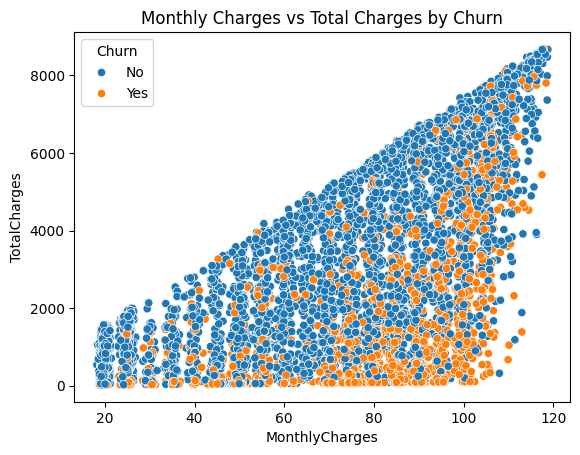

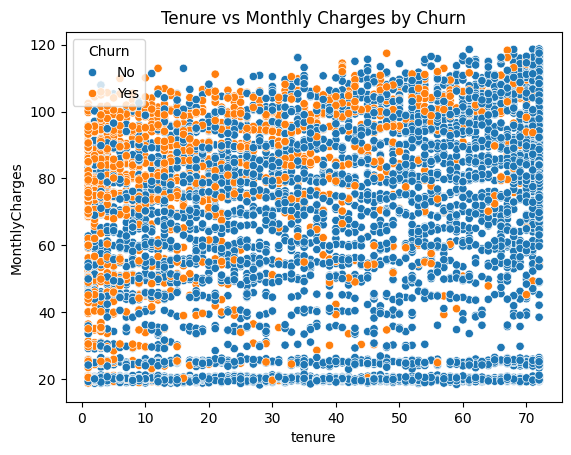

In [ ]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title("Monthly Charges vs Total Charges by Churn")
plt.show()

sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()


### 🔍 Scatter Plot Analysis: Churn Behavior

---

#### 📈 Monthly Charges vs Total Charges

- There's a clear **positive linear relationship** between monthly and total charges — expected since total = monthly × tenure.
- **Churned customers (orange)** are clustered in the **lower total charge** range, suggesting they churned early in their lifecycle.
- **Non-churned customers (blue)** are prevalent in the **higher total charge** region — reflecting **longer tenure and loyalty**.
- Interpretation: Customers who **haven’t stayed long enough** to accumulate high total charges are **more prone to churn**.

---

#### 📉 Tenure vs Monthly Charges

- Churned customers are **densely concentrated** in the **low tenure zone (0–20 months)**.
- Across all charge levels, **higher tenure consistently aligns with lower churn risk**.
- No strong correlation is visible between monthly charges and churn **once tenure is factored in**.
- Interpretation: Churn risk is **highly influenced by tenure**, more than by monthly pricing alone.

---

### 📌 Key Insights

1. **Tenure is the strongest churn indicator** — especially in the early months.
2. **Early intervention is critical** — retention efforts should focus on the **first 20 months**.
3. **Total Charges ≈ Loyalty** — higher cumulative spend is associated with customer retention.
4. **Monthly Charges alone** are not enough — must be contextualized with **tenure** to understand churn behavior.

---

💡 **Recommendation:**  
Focus retention strategies on **new customers** — improve onboarding, deliver early value, and offer engagement incentives within the **first 1–2 years** to reduce churn.


🔹 Step 8: Correlation Heatmap (Numerical Only)


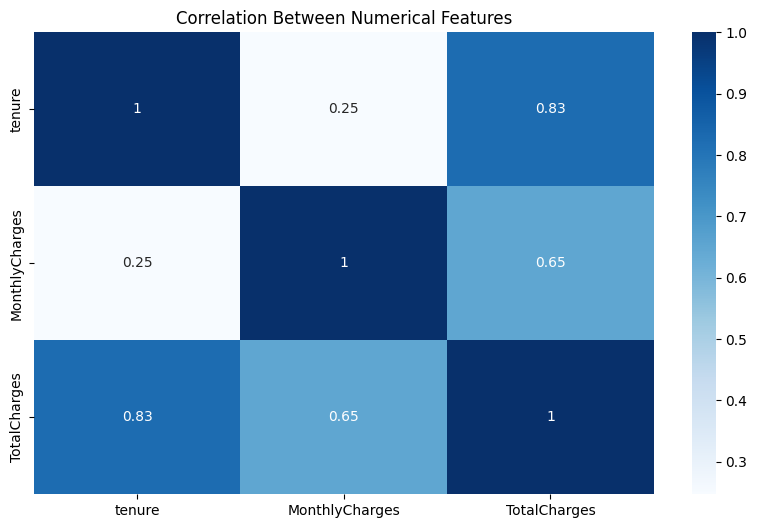

In [ ]:
lt.figure(figsize=(10, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Numerical Features")
plt.show()


### 🔥 Correlation Heatmap Analysis

This correlation heatmap reveals key relationships between numerical features in the telecom dataset.

---

### 📊 Key Correlation Insights

- **🔗 Strong Positive Correlation (0.83)** between `tenure` and `TotalCharges`  
  → Customers who have been with the company longer tend to accumulate higher total charges — expected, since total charges grow with time.

- **📈 Moderate Positive Correlation (0.65)** between `MonthlyCharges` and `TotalCharges`  
  → Customers with higher monthly bills usually accumulate more total charges, though tenure still plays a larger role.

- **📉 Weak Positive Correlation (0.25)** between `tenure` and `MonthlyCharges`  
  → Monthly pricing does not vary significantly with how long a customer has been with the company.

---

### 💼 Business Implications

- **Retention Drives Revenue**: Strong correlation between tenure and total charges emphasizes the value of **customer retention**.
- **Flat Pricing Strategy?**: The weak tenure-monthly charge correlation suggests **little pricing variation over time**, possibly indicating a lack of loyalty-based pricing.
- **Consistent Billing**: Monthly charges are relatively independent of customer longevity — may indicate **standardized pricing across customer base**.

---

💡 **Recommendation**:  
Focus on **long-term retention** strategies to boost lifetime value. Consider **tiered pricing models** or loyalty incentives to drive revenue over time.


 Week 1 Summary
Loaded and cleaned the Telco dataset

Converted TotalCharges to numeric and dropped invalid entries

Identified class imbalance in the Churn column

Performed univariate and bivariate analysis for key features

Found strong relationships with churn:
Contract, tenure, MonthlyCharges, OnlineSecurity